In [1]:
# header: importing useful modules and functions

import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Part 1: Modeling the global carbon cycle

### Section 2

In [2]:
# definition of the impulse response function for atmospheric CO2
def irf_CO2(t):
    irf =  a_C0 + a_C1 * np.exp(-t/tau_C1) + a_C2 * np.exp(-t/tau_C2) + a_C3 * np.exp(-t/tau_C3)
    return irf

In [3]:
# with the following values of the parameters
a_C0 = 0.2173
a_C1 = 0.2240
a_C2 = 0.2824
a_C3 = 0.2763
tau_C1 = 394.4 #{yr}
tau_C2 = 36.54 #{yr}
tau_C3 = 4.304 #{yr}

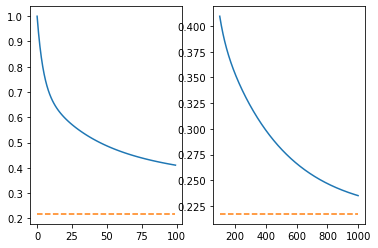

In [5]:
### Figure 1 ###
# plot the IRF for atmospheric CO2
plt.figure()
# over the first 100 years
time1 = np.arange(0,100)
plt.subplot(1,2,1)
plt.plot(time1,irf_CO2(time1))
plt.plot(time1,a_C0*np.ones(np.shape(time1)),ls='--')
# up to 1000 years
time2 = np.arange(100,1000)
plt.subplot(1,2,2)
plt.plot(time2,irf_CO2(time2),label='irf_CO2')
plt.plot(time2,a_C0*np.ones(np.shape(time2)),ls='--',label='a_C0')


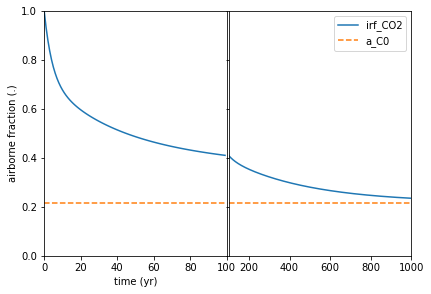

In [7]:
### Figure 1 ###
# plot the IRF for atmospheric CO2
plt.figure()
# over the first 100 years
time1 = np.arange(0,100)
plt.subplot(1,2,1)
plt.plot(time1,irf_CO2(time1))
plt.plot(time1,a_C0*np.ones(np.shape(time1)),ls='--')
# up to 1000 years
time2 = np.arange(100,1000)
plt.subplot(1,2,2)
plt.plot(time2,irf_CO2(time2),label='irf_CO2')
plt.plot(time2,a_C0*np.ones(np.shape(time2)),ls='--',label='a_C0')

# polishing the figure
plt.subplot(1,2,1)
plt.axis([0,100,0,1])
plt.xlabel('time (yr)')
plt.ylabel('airborne fraction (.)')
plt.subplot(1,2,2)
plt.axis([100,1000,0,1])
plt.xticks([200,400,600,800,1000])
plt.yticks([0,0.2,0.4,0.6,0.8,1],['','','','','',''])
plt.legend(loc=0)
plt.subplots_adjust(left=0.10,bottom=0.10,right=0.95,top=0.95,wspace=0.01)

### Section 3

### Section 4

# Part 2: Analysis of IPCC/CMIP5 Earth System Model results

### Section 1.1

In [8]:
# ancillary lists for loading data
model_list = ["ACCESS-10","ACCESS-13","BCC-CSM-11",\
"BCC-CSM-11m","CanESM2","CCSM4","CNRM-CM5",\
"CNRM-CM5-2","CSIRO-Mk360","GFDL-CM3","GFDL-ESM2G",\
"GFDL-ESM2M","GISS-E2-H","GISS-E2-R",\
"HadGEM2-ES","IPSL-CM5A-LR","IPSL-CM5A-MR",\
"IPSL-CM5B-LR","MIROC5","MIROC-ESM","MPI-ESM-LR",\
"MPI-ESM-MR","MPI-ESM-P","MRI-CGCM3","NorESM1-M"]

# some models run their simulation longer than others
model_length = {"ACCESS-10":150,"ACCESS-13":151,"BCC-CSM-11":150,\
"BCC-CSM-11m":150,"CanESM2":150,\
"CCSM4":151,"CNRM-CM5":150,"CNRM-CM5-2":140,\
"CSIRO-Mk360":150,"GFDL-CM3":150,"GFDL-ESM2G":300,\
"GFDL-ESM2M":300,"GISS-E2-H":151,"GISS-E2-R":151,\
"HadGEM2-ES":151,"IPSL-CM5A-LR":260,\
"IPSL-CM5A-MR":140,"IPSL-CM5B-LR":160,"MIROC5":151,\
"MIROC-ESM":150,"MPI-ESM-LR":150,"MPI-ESM-MR":150,\
"MPI-ESM-P":150,"MRI-CGCM3":150,"NorESM1-M":150}

# create array of final variables
# tas in {degC}; rsdt,rlut,rsut in {W/m2}

In [9]:
for var in ["tas","rsdt","rsut","rlut"]:
    exec(var+"_ctrl = np.zeros((300,len(model_list)),) * np.nan")
    exec(var+"_quad = np.zeros((300,len(model_list)),) * np.nan")


In [10]:
# load pre-processed CMIP5 results
for mod in model_list:
    for sim in ['ctrl','quad']:
        TMP = np.array([line for line in csv.reader(open('data/Climate_CMIP5/Climate_'+mod+'.'+sim+'_global.csv','r'))][1:],dtype=float)
        lgd = [line for line in csv.reader(open('data/Climate_CMIP5/Climate_'+mod+'.'+sim+'_global.csv','r'))][0]
        for var in ['tas','rsdt','rsut','rlut']:
            exec(var+'_'+sim+'[:len(TMP),model_list.index(mod)] = TMP[:,lgd.index(var)]')

### Section 1.2

### Section 1.3

### Section 2.1

### Section 2.2

### Section 2.3

### Section 3

# Part 3: Investigating the contribution of various GHGs

### Section 1

In [ ]:
# climate IRF used in IPCC AR5
def irf_GMT(t):
    irf = 0.631/8.4*np.exp(-t/8.4) + 0.429/409.5*np.exp(-t/409.5)
    return irf

# parameters
# CH4
tau_CH4 = 12.4 #{yr}
radeff_CH4 = 3.63E-4 #{W/m2 / ppb}
k_CH4 = k_CO2 * 16/44. #{TgCH4 / ppb}
# CO2
radeff_CO2 = 1.37E-5 #{W/m2 / ppb}


### Section 2